In [5]:
import pandas as pd
import numpy as np;import scipy.stats as stats
adult=pd.read_csv('test_file/adult.csv',sep=',')         #header=None即不将数据的第一行作为标题
#这里用R获取数据遇到一个问题，直接write.table()导出arules包的AdultUCI.csv时全部挤到一个单元格里了，解决方法是加参数sep=','
adult.head()
adult.describe()
workclass=adult.groupby('workclass')
pd.crosstab(adult.income,adult.race)                      #形成列联表

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
large,36,276,387,25,7117
small,275,763,2737,246,20699


In [3]:
#一个print()函数使用细节
print('10*pi={:1.4f},\n10*pi={:20.4f}'.format(np.pi*10,np.pi*10))

10*pi=31.4159,
10*pi=             31.4159


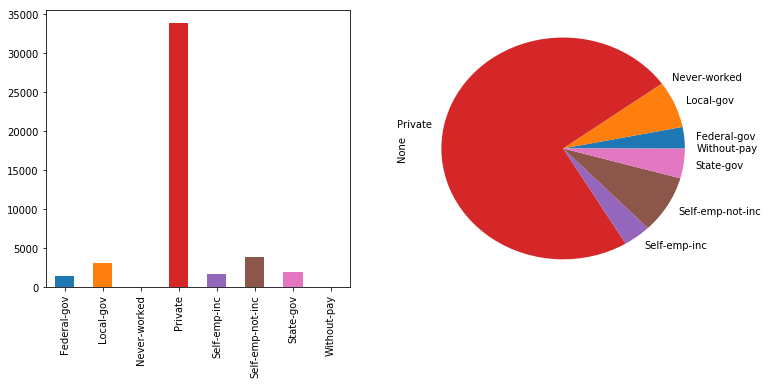

In [6]:
#在Python中分类变量的处理不如R中方便，需要转化成“哑元”
import matplotlib.pyplot as plt
%matplotlib inline
xw=pd.get_dummies(adult['workclass']).sum(axis=0)          #把workclass下各分类转化成哑元，再对各哑元求和
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5.1))
xw.plot(kind='bar',ax=axes[0])
xw.plot(kind='pie',ax=axes[1])

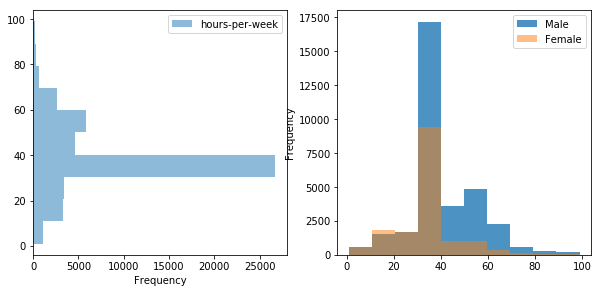

In [14]:
#对hours_per_week画一个横向直方图，以及把hours_per_week按性别分两个数据，并叠加直方图
w=adult
M=w['hours-per-week'][w['sex']=='Male']
F=w['hours-per-week'][w['sex']=='Female']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4.5))
w[['hours-per-week']].plot(kind='hist',orientation='horizontal',alpha=0.5,ax=axes[0])         #alpha指透明度
M.plot(kind='hist',alpha=0.8,ax=axes[1],label='Male')
F.plot(kind='hist',alpha=0.5,ax=axes[1],label='Female')                                       #条形图并排转叠放→加参数stacked=True
plt.legend()

#### 接下来是箱式图，用到了R的ggplot2的包里的diamonds.csv数据；获取方法为：
在R Studio里输入：
```$R
install.packges('ggplot2')
libray('ggplot2')
data("diamonds")
write.table(diamonds,"yourPath/diamonds.csv",sep=',')
```

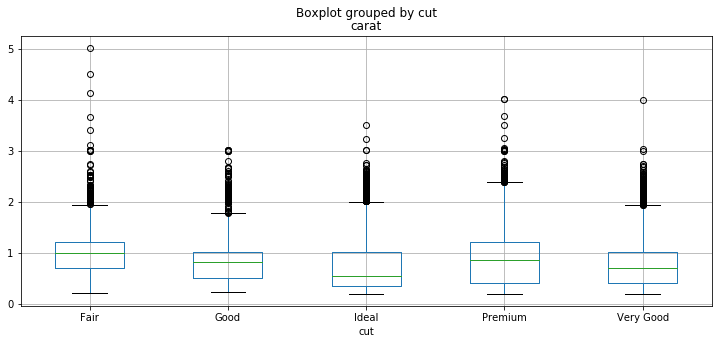

In [16]:
#一个分类变量cut的各个水平对应于一个数量变量carat的盒形图
diamonds=pd.read_csv('test_file/diamonds.csv')
diamonds.boxplot(column='carat',by='cut',figsize=(12,5))

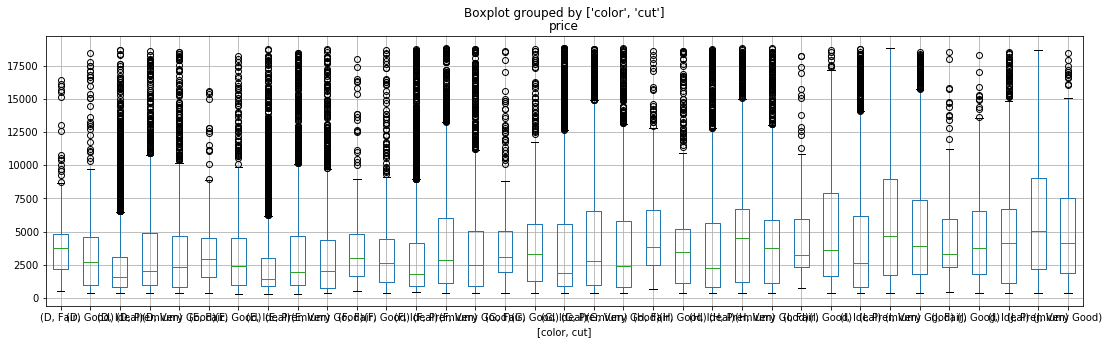

In [18]:
#也可以对某一数量变量price按不同分类变量组合
diamonds.boxplot(column=['price'],by=['color','cut'],figsize=(18,5))

In [19]:
#还可以把若干同符号曲线叠加，画面积图area plot
x=np.sin(np.arange(0,5,.2))+1
y=np.cos(np.arange(0,5,.2))+1
w=np.stack((x,y),axis=1)
w

array([[1.00000000e+00, 2.00000000e+00],
       [1.19866933e+00, 1.98006658e+00],
       [1.38941834e+00, 1.92106099e+00],
       [1.56464247e+00, 1.82533561e+00],
       [1.71735609e+00, 1.69670671e+00],
       [1.84147098e+00, 1.54030231e+00],
       [1.93203909e+00, 1.36235775e+00],
       [1.98544973e+00, 1.16996714e+00],
       [1.99957360e+00, 9.70800478e-01],
       [1.97384763e+00, 7.72797905e-01],
       [1.90929743e+00, 5.83853163e-01],
       [1.80849640e+00, 4.11498883e-01],
       [1.67546318e+00, 2.62606284e-01],
       [1.51550137e+00, 1.43111247e-01],
       [1.33498815e+00, 5.77776593e-02],
       [1.14112001e+00, 1.00075034e-02],
       [9.41625857e-01, 1.70522421e-03],
       [7.44458898e-01, 3.32018074e-02],
       [5.57479557e-01, 1.03241584e-01],
       [3.88142109e-01, 2.09032288e-01],
       [2.43197505e-01, 3.46356379e-01],
       [1.28424228e-01, 5.09739179e-01],
       [4.83979261e-02, 6.92667130e-01],
       [6.30899637e-03, 8.87847473e-01],
       [3.835391

In [20]:
w=pd.DataFrame(w,columns=['sin','cos'])
w

,sin,cos
0,1.000000,2.000000
1,1.198669,1.980067
2,1.389418,1.921061
3,1.564642,1.825336
4,1.717356,1.696707
5,1.841471,1.540302
6,1.932039,1.362358
7,1.985450,1.169967
8,1.999574,0.970800
9,1.973848,0.772798


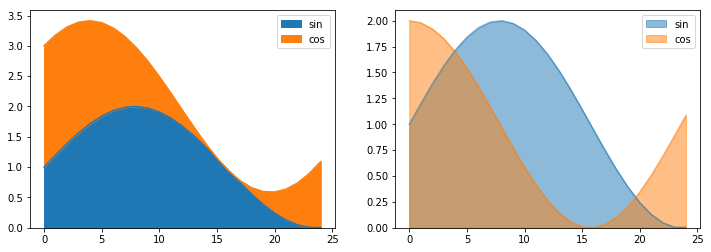

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
w.plot(kind='area',ax=axes[0])
w.plot(kind='area',stacked=False,ax=axes[1])

In [23]:
#将分类变量转化为哑元变量
#1.分类变量是数字表面时，进行因子化
Y=pd.DataFrame({'sex':[1,0,0,0,1,1,1,0]})
Y['sex']=Y['sex'].astype('category')                 #类似R语言中的as.factor()
#2.分类变量转化为哑元变量
a=[1,3,5,6,7,8,9,13,14]
adult.columns[a]

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
w=adult
for i in w.columns[a]:
    for elem in w[i].unique():                      #unique()函数
        w[str(elem)]=(w[i]==elem)*1                 #通过*1把TRUE/False转化成了1或0
w[w.columns[15:24]].head()

In [9]:
#也可以直接用函数对所有字符串代表水平的分类变量做哑元转换，而 保持 原来的数量变量
adult1=pd.get_dummies(adult)
adult1.head()
#adult.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_large,income_small
0,1,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,50,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3,38,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,53,234721,7,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,5,28,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
